In [67]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 487.6 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 

### Importing the packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Importing the data sets

In [5]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Traffic prediction\dataset_traffic_accident_prediction1.csv")

### Reading the columns from dataset

In [7]:
data.columns


Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [8]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


### Checking for null values in the dataset

In [10]:
data.isna().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

### filling the null values

In [12]:
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)  # As weather is  categorical

In [13]:
data['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)

In [14]:
data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)

In [15]:
data['Traffic_Density'].fillna(data['Traffic_Density'].median(), inplace=True)

In [16]:
data['Speed_Limit'].fillna(data['Speed_Limit'].median(), inplace=True)

In [17]:
data['Number_of_Vehicles'].fillna(data['Number_of_Vehicles'].median(), inplace=True)

In [18]:
data['Driver_Alcohol'].fillna(data['Driver_Alcohol'].mode()[0], inplace=True)

In [19]:
data['Accident_Severity'].fillna(data['Accident_Severity'].mode()[0], inplace=True)

In [20]:
data['Road_Condition'].fillna(data['Road_Condition'].mode()[0], inplace=True)
data['Vehicle_Type'].fillna(data['Vehicle_Type'].mode()[0], inplace=True)
data['Driver_Age'].fillna(data['Driver_Age'].median(), inplace=True)
data['Driver_Experience'].fillna(data['Driver_Experience'].median(), inplace=True)
data['Road_Light_Condition'].fillna(data['Road_Light_Condition'].mode()[0], inplace=True)
data['Accident'].fillna(data['Accident'].mode()[0], inplace=True)

In [21]:
data.isna().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

### Checking for duplicate data

In [23]:
data.duplicated().sum()

18

In [159]:
data

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,1.0,30.0,4.0,1.0,High,Dry,Car,43.0,34.0,Artificial Light,0.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


### Removing the duplicate data

In [161]:
dataframe = data.copy()
dataframe.drop_duplicates(inplace=True)

In [163]:
dataframe.duplicated().sum()

0

In [165]:
dataframe

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,1.0,30.0,4.0,1.0,High,Dry,Car,43.0,34.0,Artificial Light,0.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [167]:
# Assign data types to columns
data_clean = dataframe.astype({
    'Weather': 'category',            
    'Road_Type': 'category',
    'Time_of_Day': 'category',
    'Traffic_Density': 'int64',        
    'Speed_Limit': 'int64',             
    'Number_of_Vehicles': 'int64',
    'Driver_Alcohol': 'category',      
    'Accident_Severity': 'category',   
    'Road_Condition': 'category',
    'Vehicle_Type': 'category',
    'Driver_Age': 'int64',
    'Driver_Experience': 'int64', 
    'Road_Light_Condition': 'category',
    'Accident': 'category' 
})

In [171]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Weather               822 non-null    category
 1   Road_Type             822 non-null    category
 2   Time_of_Day           822 non-null    category
 3   Traffic_Density       822 non-null    int64   
 4   Speed_Limit           822 non-null    int64   
 5   Number_of_Vehicles    822 non-null    int64   
 6   Driver_Alcohol        822 non-null    category
 7   Accident_Severity     822 non-null    category
 8   Road_Condition        822 non-null    category
 9   Vehicle_Type          822 non-null    category
 10  Driver_Age            822 non-null    int64   
 11  Driver_Experience     822 non-null    int64   
 12  Road_Light_Condition  822 non-null    category
 13  Accident              822 non-null    category
dtypes: category(9), int64(5)
memory usage: 47.3 KB


In [30]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [31]:
age_outliers = find_outliers(data_clean, 'Traffic_Density')
age_outliers

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident


In [173]:
data_clean.info()
data_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Weather               822 non-null    category
 1   Road_Type             822 non-null    category
 2   Time_of_Day           822 non-null    category
 3   Traffic_Density       822 non-null    int64   
 4   Speed_Limit           822 non-null    int64   
 5   Number_of_Vehicles    822 non-null    int64   
 6   Driver_Alcohol        822 non-null    category
 7   Accident_Severity     822 non-null    category
 8   Road_Condition        822 non-null    category
 9   Vehicle_Type          822 non-null    category
 10  Driver_Age            822 non-null    int64   
 11  Driver_Experience     822 non-null    int64   
 12  Road_Light_Condition  822 non-null    category
 13  Accident              822 non-null    category
dtypes: category(9), int64(5)
memory usage: 47.3 KB


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Age,Driver_Experience
count,822.000000,822.000000,822.000000,822.000000,822.000000
mean,1.001217,70.593674,3.273723,43.130170,38.888078
std,0.763828,31.551367,1.975308,14.705434,14.859787
min,0.000000,30.000000,1.000000,18.000000,9.000000
25%,0.000000,50.000000,2.000000,31.000000,26.000000
50%,1.000000,60.000000,3.000000,43.000000,39.000000
75%,2.000000,80.000000,4.000000,55.000000,52.000000
max,2.000000,213.000000,14.000000,69.000000,69.000000


In [175]:
data_clean

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0.0,Low,Wet,Car,51,48,Artificial Light,0.0
1,Clear,Rural Road,Night,1,120,3,0.0,Moderate,Wet,Truck,49,43,Artificial Light,0.0
2,Rainy,Highway,Evening,1,60,4,0.0,Low,Icy,Car,54,52,Artificial Light,0.0
3,Clear,City Road,Afternoon,2,60,3,0.0,Low,Under Construction,Bus,34,31,Daylight,0.0
4,Rainy,Highway,Morning,1,195,11,0.0,Low,Dry,Car,62,55,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0.0,Low,Dry,Car,23,15,Daylight,0.0
836,Rainy,Rural Road,Evening,2,60,4,0.0,Low,Dry,Motorcycle,52,46,Daylight,1.0
837,Foggy,Highway,Evening,1,30,4,1.0,High,Dry,Car,43,34,Artificial Light,0.0
838,Foggy,Highway,Afternoon,2,60,3,0.0,Low,Dry,Car,25,19,Artificial Light,0.0


In [177]:
df2 = data_clean.copy()

In [179]:
df2

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1,100,5,0.0,Low,Wet,Car,51,48,Artificial Light,0.0
1,Clear,Rural Road,Night,1,120,3,0.0,Moderate,Wet,Truck,49,43,Artificial Light,0.0
2,Rainy,Highway,Evening,1,60,4,0.0,Low,Icy,Car,54,52,Artificial Light,0.0
3,Clear,City Road,Afternoon,2,60,3,0.0,Low,Under Construction,Bus,34,31,Daylight,0.0
4,Rainy,Highway,Morning,1,195,11,0.0,Low,Dry,Car,62,55,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2,30,4,0.0,Low,Dry,Car,23,15,Daylight,0.0
836,Rainy,Rural Road,Evening,2,60,4,0.0,Low,Dry,Motorcycle,52,46,Daylight,1.0
837,Foggy,Highway,Evening,1,30,4,1.0,High,Dry,Car,43,34,Artificial Light,0.0
838,Foggy,Highway,Afternoon,2,60,3,0.0,Low,Dry,Car,25,19,Artificial Light,0.0


In [181]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in df2.select_dtypes(include=['category']).columns:
    df2[column] = label_encoder.fit_transform(df2[column])

In [185]:
df2.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1,100,5,0,1,3,1,51,48,0,0
1,0,3,3,1,120,3,0,2,3,3,49,43,0,0
2,2,1,1,1,60,4,0,1,1,1,54,52,0,0
3,0,0,0,2,60,3,0,1,2,0,34,31,1,0
4,2,1,2,1,195,11,0,1,0,1,62,55,0,1


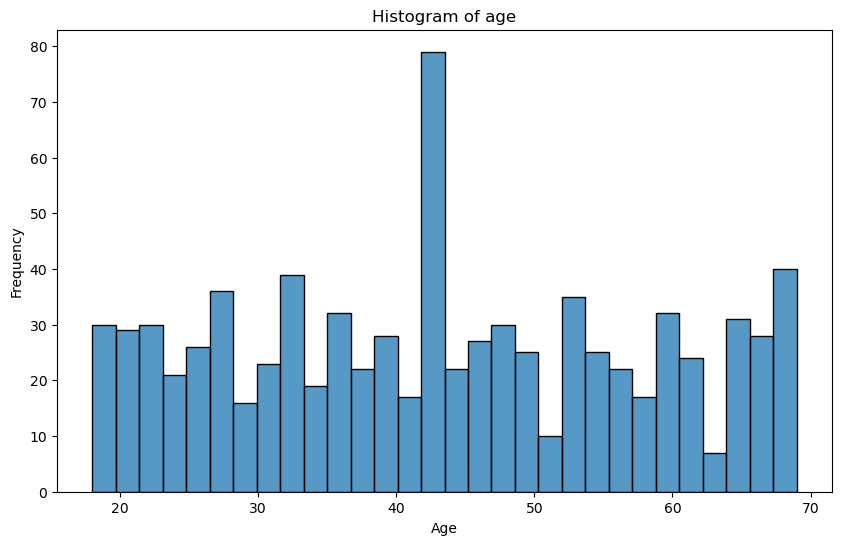

In [32]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Driver_Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

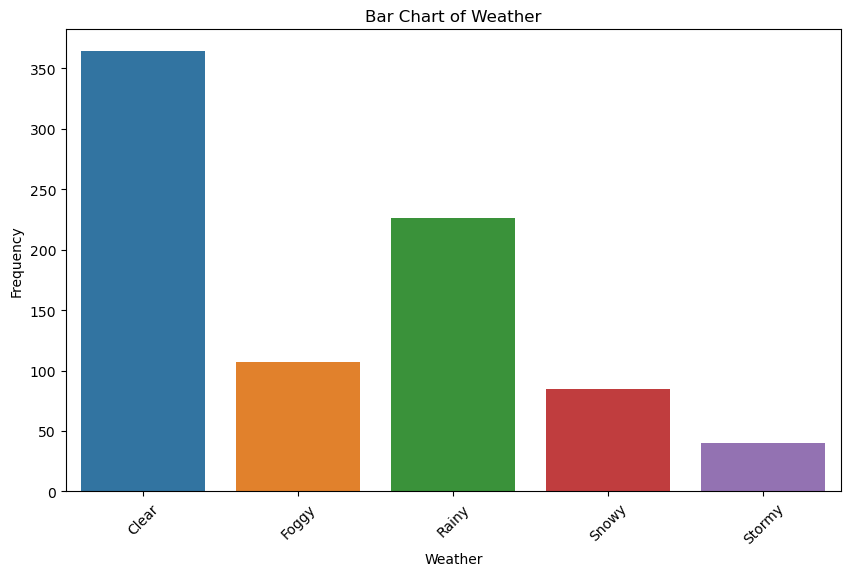

In [33]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['Weather'])
plt.title('Bar Chart of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

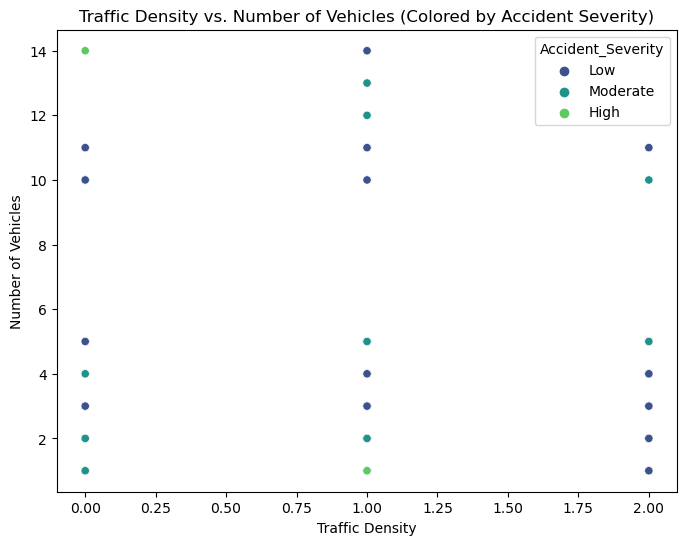

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Traffic_Density', y='Number_of_Vehicles', data=df, hue='Accident_Severity', palette='viridis')
plt.title('Traffic Density vs. Number of Vehicles (Colored by Accident Severity)')
plt.xlabel('Traffic Density')
plt.ylabel('Number of Vehicles')
plt.show()

In [187]:
df2['Traffic_Density'].value_counts()

Traffic_Density
1    343
2    240
0    239
Name: count, dtype: int64

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Weather               822 non-null    int32
 1   Road_Type             822 non-null    int32
 2   Time_of_Day           822 non-null    int32
 3   Traffic_Density       822 non-null    int64
 4   Speed_Limit           822 non-null    int64
 5   Number_of_Vehicles    822 non-null    int64
 6   Driver_Alcohol        822 non-null    int64
 7   Accident_Severity     822 non-null    int32
 8   Road_Condition        822 non-null    int32
 9   Vehicle_Type          822 non-null    int32
 10  Driver_Age            822 non-null    int64
 11  Driver_Experience     822 non-null    int64
 12  Road_Light_Condition  822 non-null    int32
 13  Accident              822 non-null    int64
dtypes: int32(7), int64(7)
memory usage: 73.9 KB


### categorical_cols = df2.describe(include='category').columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_cols:
    df2[column] = label_encoder.fit_transform(df2[column])

In [196]:
df2.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1,100,5,0,1,3,1,51,48,0,0
1,0,3,3,1,120,3,0,2,3,3,49,43,0,0
2,2,1,1,1,60,4,0,1,1,1,54,52,0,0
3,0,0,0,2,60,3,0,1,2,0,34,31,1,0
4,2,1,2,1,195,11,0,1,0,1,62,55,0,1


In [202]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Weather               822 non-null    int32
 1   Road_Type             822 non-null    int32
 2   Time_of_Day           822 non-null    int32
 3   Traffic_Density       822 non-null    int64
 4   Speed_Limit           822 non-null    int64
 5   Number_of_Vehicles    822 non-null    int64
 6   Driver_Alcohol        822 non-null    int64
 7   Accident_Severity     822 non-null    int32
 8   Road_Condition        822 non-null    int32
 9   Vehicle_Type          822 non-null    int32
 10  Driver_Age            822 non-null    int64
 11  Driver_Experience     822 non-null    int64
 12  Road_Light_Condition  822 non-null    int32
 13  Accident              822 non-null    int64
dtypes: int32(7), int64(7)
memory usage: 73.9 KB


In [155]:
d.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,0.5,0.000000,0.666667,0.5,0.382514,0.307692,0.0,NaN,1.000000,0.333333,0.647059,0.650000,0.0,0.0
1,0.0,1.000000,1.000000,0.5,0.491803,0.153846,0.0,NaN,1.000000,1.000000,0.607843,0.566667,0.0,0.0
2,0.5,0.333333,0.333333,0.5,0.163934,0.230769,0.0,NaN,0.333333,0.333333,0.705882,0.716667,0.0,0.0
3,0.0,0.000000,0.000000,1.0,0.163934,0.153846,0.0,NaN,0.666667,0.000000,0.313725,0.366667,0.5,0.0
4,0.5,0.333333,0.666667,0.5,0.901639,0.769231,0.0,NaN,0.000000,0.333333,0.862745,0.766667,0.0,1.0


In [198]:
df3 = df2.copy()

In [200]:
df3

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1,100,5,0,1,3,1,51,48,0,0
1,0,3,3,1,120,3,0,2,3,3,49,43,0,0
2,2,1,1,1,60,4,0,1,1,1,54,52,0,0
3,0,0,0,2,60,3,0,1,2,0,34,31,1,0
4,2,1,2,1,195,11,0,1,0,1,62,55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,1,3,2,30,4,0,1,0,1,23,15,1,0
836,2,3,1,2,60,4,0,1,0,2,52,46,1,1
837,1,1,1,1,30,4,1,0,0,1,43,34,0,0
838,1,1,0,2,60,3,0,1,0,1,25,19,0,0


In [204]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
print("Before Normalized DataFrame:")
print(df3['Traffic_Density'].describe())


# Select numerical columns (excluding encoded categorical columns)
numerical_columns = df3.select_dtypes(include=['int32','int64']).columns

# Normalize using MinMaxScaler (scales values to a range of 0 to 1)
scaler = MinMaxScaler()
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])
print("After Normalized DataFrame:")
print(df3['Traffic_Density'].describe())

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(df3.head())

Before Normalized DataFrame:
count    822.000000
mean       1.001217
std        0.763828
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Traffic_Density, dtype: float64
After Normalized DataFrame:
count    822.000000
mean       0.500608
std        0.381914
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Traffic_Density, dtype: float64
Normalized DataFrame:
   Weather  Road_Type  Time_of_Day  Traffic_Density  Speed_Limit  \
0      0.5   0.000000     0.666667              0.5     0.382514   
1      0.0   1.000000     1.000000              0.5     0.491803   
2      0.5   0.333333     0.333333              0.5     0.163934   
3      0.0   0.000000     0.000000              1.0     0.163934   
4      0.5   0.333333     0.666667              0.5     0.901639   

   Number_of_Vehicles  Driver_Alcohol  Accident_Severity  Road_Condition  \
0            0.307692             0.0   

In [206]:
df3['Accident_Severity'].value_counts()

Accident_Severity
0.5    507
1.0    237
0.0     78
Name: count, dtype: int64

In [208]:
df3['Accident_Severity']

0      0.5
1      1.0
2      0.5
3      0.5
4      0.5
      ... 
835    0.5
836    0.5
837    0.0
838    0.5
839    0.5
Name: Accident_Severity, Length: 822, dtype: float64

In [214]:
X = df3.drop(columns=['Accident_Severity'])
y = df3['Accident_Severity']

X.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,0.5,0.000000,0.666667,0.5,0.382514,0.307692,0.0,1.000000,0.333333,0.647059,0.650000,0.0,0.0
1,0.0,1.000000,1.000000,0.5,0.491803,0.153846,0.0,1.000000,1.000000,0.607843,0.566667,0.0,0.0
2,0.5,0.333333,0.333333,0.5,0.163934,0.230769,0.0,0.333333,0.333333,0.705882,0.716667,0.0,0.0
3,0.0,0.000000,0.000000,1.0,0.163934,0.153846,0.0,0.666667,0.000000,0.313725,0.366667,0.5,0.0
4,0.5,0.333333,0.666667,0.5,0.901639,0.769231,0.0,0.000000,0.333333,0.862745,0.766667,0.0,1.0


In [216]:
y.head()

0    0.5
1    1.0
2    0.5
3    0.5
4    0.5
Name: Accident_Severity, dtype: float64

In [250]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
d_resampled = pd.DataFrame(X_resampled, columns=X.columns)
d_resampled['Accident_Severity'] = y_resampled

# Verify the new distribution
print(d_resampled['Accident_Severity'].value_counts())

Accident_Severity
1    507
2    507
0    507
Name: count, dtype: int64


In [252]:
d_resampled

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident,Accident_Severity
0,2,0,2,1,100,5,0,3,1,51,48,0,0,1
1,0,3,3,1,120,3,0,3,3,49,43,0,0,2
2,2,1,1,1,60,4,0,1,1,54,52,0,0,1
3,0,0,0,2,60,3,0,2,0,34,31,1,0,1
4,2,1,2,1,195,11,0,0,1,62,55,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0,0,0,0,30,4,0,0,1,63,55,0,1,2
1517,0,2,0,0,100,5,0,1,1,32,24,0,0,2
1518,0,0,0,1,100,2,0,3,1,55,50,0,0,2
1519,2,0,0,0,55,4,0,0,2,18,11,0,0,2


In [254]:
X = d_resampled.drop(columns = ['Accident_Severity'])  # Features (dummy feature for demonstration)
y = d_resampled['Accident_Severity']

In [256]:
y

0       1
1       2
2       1
3       1
4       1
       ..
1516    2
1517    2
1518    2
1519    2
1520    2
Name: Accident_Severity, Length: 1521, dtype: int32

### from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Check the class distribution
print("Original class distribution:", Counter(d['Accident_Severity']))

# Encode the target variable
d['Accident_Severity'] = d['Accident_Severity'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Separate features and target
X = d.drop(columns = ['Accident_Severity'])  # Features (dummy feature for demonstration)
y = d['Accident_Severity']    # Target

# Apply RandomOverSampler to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Decode the target variable back to original labels
df_resampled = pd.d(X_resampled, columns=['Accident_Severity'])
df_resampled['Accident_Severity'] = df_resampled['Accident_Severity'].map({0: 'Low', 1: 'Moderate', 2: 'High'})

# Display the balanced dataset
print(df_resampled['Accident_Severity'].value_counts())

In [262]:
from sklearn.model_selection import train_test_split

# # Define features (X) and target (y)
# X = d.drop(columns=df_resampled['Accident_Severity'])  # Features (all columns except target)
# y = df_resampled['Accident_Severity']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importances
importance_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance (descending order)
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances (Excluding Encoded Columns):")
print(importance_data)

Train set: (1064, 13) (1064,)

Test set: (457, 13) (457,)
Feature Importances (Excluding Encoded Columns):
                 Feature  Importance
10     Driver_Experience    0.161215
9             Driver_Age    0.158388
4            Speed_Limit    0.120962
5     Number_of_Vehicles    0.089010
0                Weather    0.071770
2            Time_of_Day    0.070202
1              Road_Type    0.062661
3        Traffic_Density    0.060678
7         Road_Condition    0.059522
11  Road_Light_Condition    0.046868
8           Vehicle_Type    0.046440
12              Accident    0.030631
6         Driver_Alcohol    0.021652


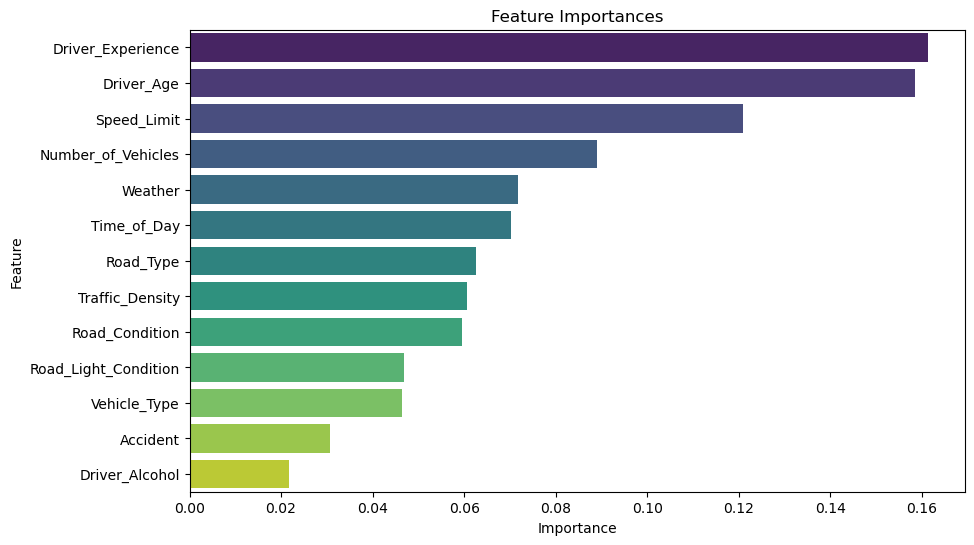

In [266]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [270]:
d_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Weather               1521 non-null   int32
 1   Road_Type             1521 non-null   int32
 2   Time_of_Day           1521 non-null   int32
 3   Traffic_Density       1521 non-null   int64
 4   Speed_Limit           1521 non-null   int64
 5   Number_of_Vehicles    1521 non-null   int64
 6   Driver_Alcohol        1521 non-null   int64
 7   Road_Condition        1521 non-null   int32
 8   Vehicle_Type          1521 non-null   int32
 9   Driver_Age            1521 non-null   int64
 10  Driver_Experience     1521 non-null   int64
 11  Road_Light_Condition  1521 non-null   int32
 12  Accident              1521 non-null   int64
 13  Accident_Severity     1521 non-null   int32
dtypes: int32(7), int64(7)
memory usage: 124.9 KB


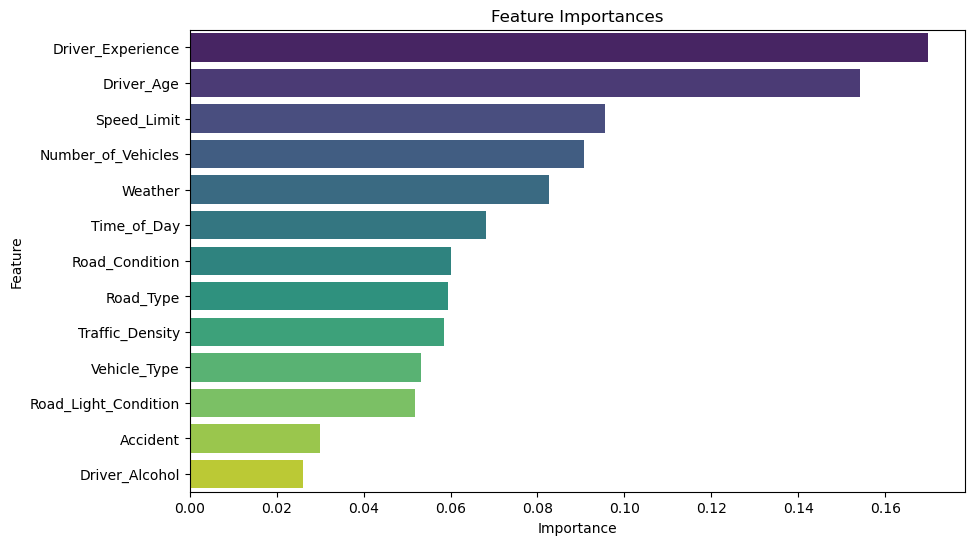

In [224]:
# # Plot feature importances
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
# plt.title('Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

### Decision Tree

In [275]:
# Initialize the Decision Tree Classifier with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [277]:
y_pred = model.predict(X_test)

In [279]:
feature_names = X.columns.tolist()

In [281]:
class_names = data['Accident_Severity'].unique().tolist()

In [283]:
class_names

['Low', 'Moderate', 'High']

[Text(0.739968359375, 0.9761904761904762, 'x[12] <= 0.5\nentropy = 1.585\nsamples = 1064\nvalue = [347, 362, 355]'),
 Text(0.57383671875, 0.9285714285714286, 'x[5] <= 4.5\nentropy = 1.579\nsamples = 871\nvalue = [323, 257, 291]'),
 Text(0.6569025390625001, 0.9523809523809523, 'True  '),
 Text(0.3869734375, 0.8809523809523809, 'x[11] <= 0.5\nentropy = 1.566\nsamples = 766\nvalue = [313, 213, 240]'),
 Text(0.247621875, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.51\nsamples = 491\nvalue = [234, 106, 151]'),
 Text(0.15064375, 0.7857142857142857, 'x[9] <= 61.5\nentropy = 1.565\nsamples = 205\nvalue = [67, 55, 83]'),
 Text(0.1108875, 0.7380952380952381, 'x[7] <= 2.5\nentropy = 1.557\nsamples = 181\nvalue = [67, 44, 70]'),
 Text(0.056975, 0.6904761904761905, 'x[4] <= 47.5\nentropy = 1.542\nsamples = 166\nvalue = [67, 37, 62]'),
 Text(0.0128, 0.6428571428571429, 'x[10] <= 28.0\nentropy = 0.979\nsamples = 27\nvalue = [20, 1, 6]'),
 Text(0.0064, 0.5952380952380952, 'x[9] <= 25.0\nentropy = 0.

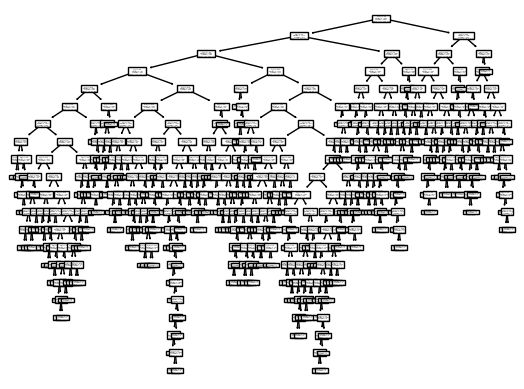

In [285]:
tree.plot_tree(model)

In [286]:
# Check the number of features
print(f"Number of features: {X.shape[1]}")

# Ensure feature_names matches the number of features
feature_names = [f'x[{i}]' for i in range(X.shape[1])]
print(f"Feature Names: {feature_names}")

Number of features: 13
Feature Names: ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]', 'x[7]', 'x[8]', 'x[9]', 'x[10]', 'x[11]', 'x[12]']


In [287]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1521, 13)
Shape of y: (1521,)


In [288]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [289]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       160
           1       0.57      0.53      0.55       145
           2       0.60      0.61      0.60       152

    accuracy                           0.63       457
   macro avg       0.63      0.63      0.63       457
weighted avg       0.63      0.63      0.63       457


Confusion Matrix:
[[121  20  19]
 [ 26  77  42]
 [ 22  38  92]]


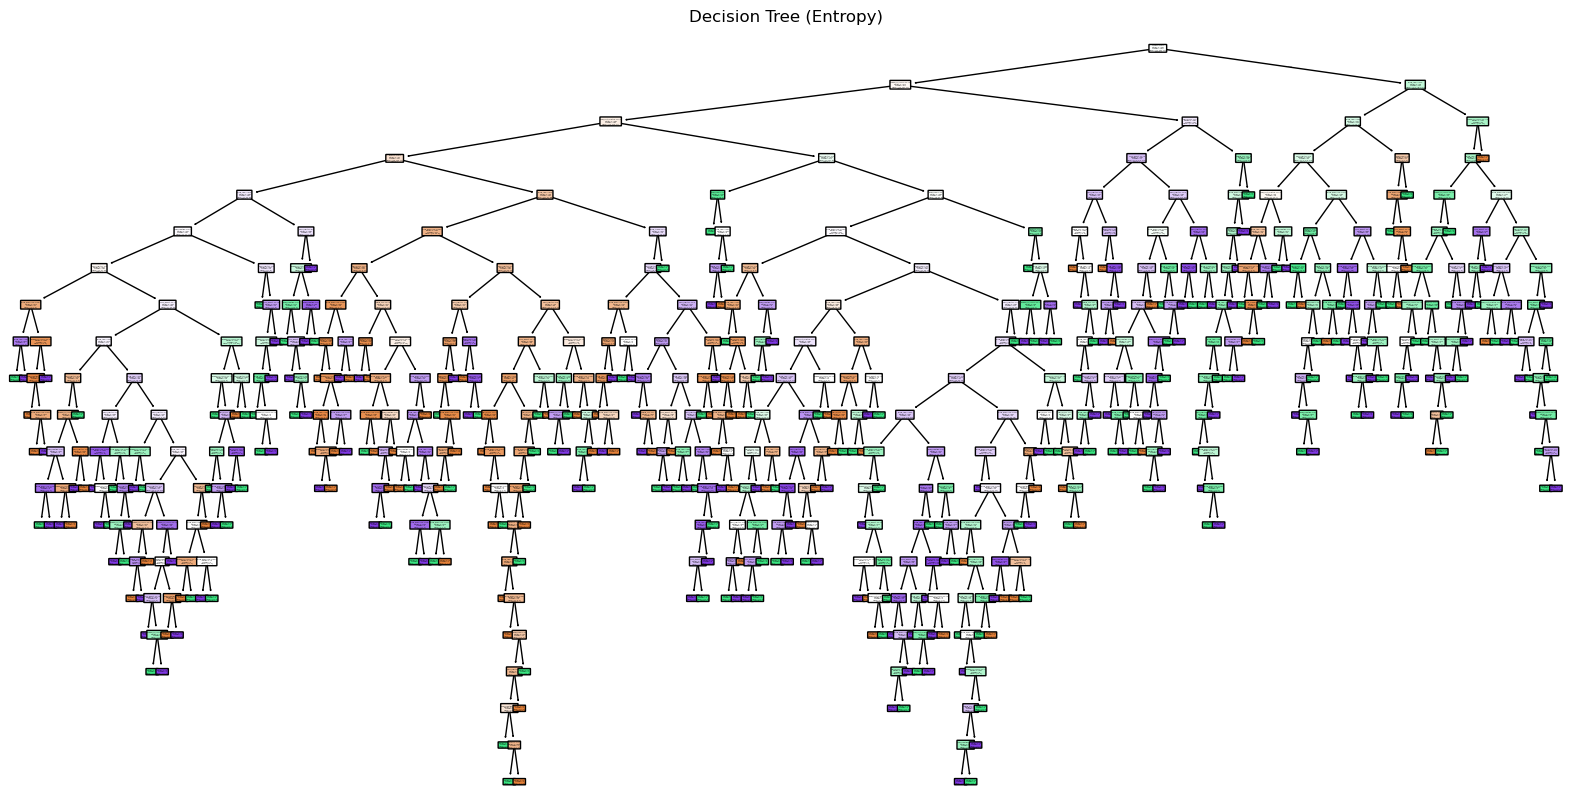

In [290]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['1', '2', '3'], filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()